In [24]:
import tensorflow as tf

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea

In [26]:
from tensorflow.python.client import device_lib 

In [27]:

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16398787948373200491
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22380806144
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6614728952992237042
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:0b:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


In [28]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [29]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [30]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [31]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [32]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [33]:
cnn_model = tf.keras.models.Sequential()

In [34]:
cnn_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [35]:
cnn_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [36]:
cnn_model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
cnn_model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [38]:
cnn_model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [39]:
cnn_model.add(tf.keras.layers.Dropout(0.25))

In [40]:
cnn_model.add(tf.keras.layers.Flatten())

In [41]:
cnn_model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [42]:
cnn_model.add(tf.keras.layers.Dropout(0.4))

In [43]:
cnn_model.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [44]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [47]:
training_history = cnn_model.fit(x=training_set, validation_data=validation_set,epochs=100)

Epoch 1/100
2197/2197 [==============================] - 49s 20ms/step - loss: 1.3674 - accuracy: 0.5983 - val_loss: 0.4837 - val_accuracy: 0.8491
Epoch 2/100
2197/2197 [==============================] - 43s 20ms/step - loss: 0.4380 - accuracy: 0.8606 - val_loss: 0.2475 - val_accuracy: 0.9190
Epoch 3/100
2197/2197 [==============================] - 43s 20ms/step - loss: 0.2710 - accuracy: 0.9132 - val_loss: 0.1901 - val_accuracy: 0.9393
Epoch 4/100
2197/2197 [==============================] - 44s 20ms/step - loss: 0.1868 - accuracy: 0.9391 - val_loss: 0.1598 - val_accuracy: 0.9484
Epoch 5/100
2197/2197 [==============================] - 44s 20ms/step - loss: 0.1405 - accuracy: 0.9541 - val_loss: 0.1349 - val_accuracy: 0.9573
Epoch 6/100
2197/2197 [==============================] - 44s 20ms/step - loss: 0.1061 - accuracy: 0.9653 - val_loss: 0.1592 - val_accuracy: 0.9521
Epoch 7/100
2197/2197 [==============================] - 44s 20ms/step - loss: 0.0918 - accuracy: 0.9695 - val_loss: 0

In [48]:
train_loss, train_acc = cnn_model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 73s 33ms/step - loss: 0.0081 - accuracy: 0.9977
Training accuracy: 0.997681200504303


In [49]:
val_loss, val_acc = cnn_model.evaluate(validation_set)
print('Validation aacuracy:', val_acc)

550/550 [==============================] - 50s 80ms/step - loss: 0.1292 - accuracy: 0.9751
Validation aacuracy: 0.9751309156417847


In [50]:
cnn_model.save('trained_plant_disease_model.keras')

In [51]:
training_history.history

{'loss': [1.3673923015594482,
  0.4380377233028412,
  0.2710224986076355,
  0.18676503002643585,
  0.14052598178386688,
  0.10614170879125595,
  0.09182385355234146,
  0.07478269934654236,
  0.06507059186697006,
  0.05705823376774788,
  0.05248579382896423,
  0.04679259657859802,
  0.04400728642940521,
  0.038013458251953125,
  0.03914973884820938,
  0.036236487329006195,
  0.032025810331106186,
  0.03131774440407753,
  0.027907229959964752,
  0.029256774112582207,
  0.025996878743171692,
  0.027170931920409203,
  0.024513985961675644,
  0.023865822702646255,
  0.020206080749630928,
  0.023183435201644897,
  0.01974903605878353,
  0.022816544398665428,
  0.01986592262983322,
  0.018919045105576515,
  0.018710143864154816,
  0.02014373056590557,
  0.015340630896389484,
  0.018124746158719063,
  0.01861521787941456,
  0.014342674054205418,
  0.018261592835187912,
  0.016804039478302002,
  0.015246223658323288,
  0.017076347023248672,
  0.013983773067593575,
  0.0163883063942194,
  0.0152

In [54]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


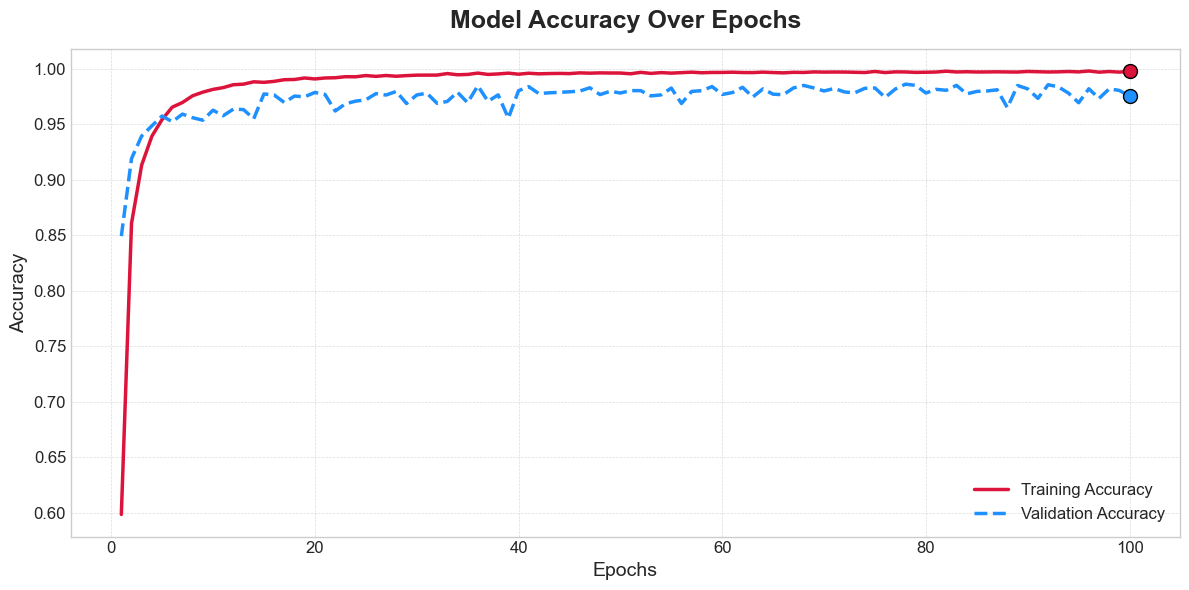

In [61]:
epochs = range(1, len(training_history.history['accuracy']) + 1)

# Plot-Stil setzen
plt.style.use('seaborn-v0_8-whitegrid')  # heller moderner Grid-Stil

# Plot
plt.figure(figsize=(12, 6))

# Training Accuracy: glatte Linie
plt.plot(epochs, 
         training_history.history['accuracy'], 
         color='crimson', 
         linewidth=2.5, 
         label='Training Accuracy')

# Validation Accuracy: glatte Linie
plt.plot(epochs, 
         training_history.history['val_accuracy'], 
         color='dodgerblue', 
         linewidth=2.5, 
         linestyle='--',   # gestrichelte Linie → bessere Unterscheidung
         label='Validation Accuracy')

# Optionale Marker NUR an letztem Punkt (für "current best")
plt.scatter(epochs[-1], training_history.history['accuracy'][-1], color='crimson', s=100, edgecolors='black', zorder=5)
plt.scatter(epochs[-1], training_history.history['val_accuracy'][-1], color='dodgerblue', s=100, edgecolors='black', zorder=5)

# Titel, Achsen etc.
plt.title('Model Accuracy Over Epochs', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Grid und Style
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Legende
plt.legend(fontsize=12, loc='lower right')

# Achsenticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Layout anpassen
plt.tight_layout()

# Plot anzeigen
plt.show()

# Andere Metriken

In [62]:
class_name = validation_set.class_names

In [63]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [65]:
y_pred = cnn_model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 46s 3ms/step


In [66]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [67]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [68]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [71]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.96      0.98       504
                                 Apple___Black_rot       0.99      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.98       440
                                   Apple___healthy       0.99      0.96      0.98       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.94      1.00      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.87      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.97      0.

# Matrix

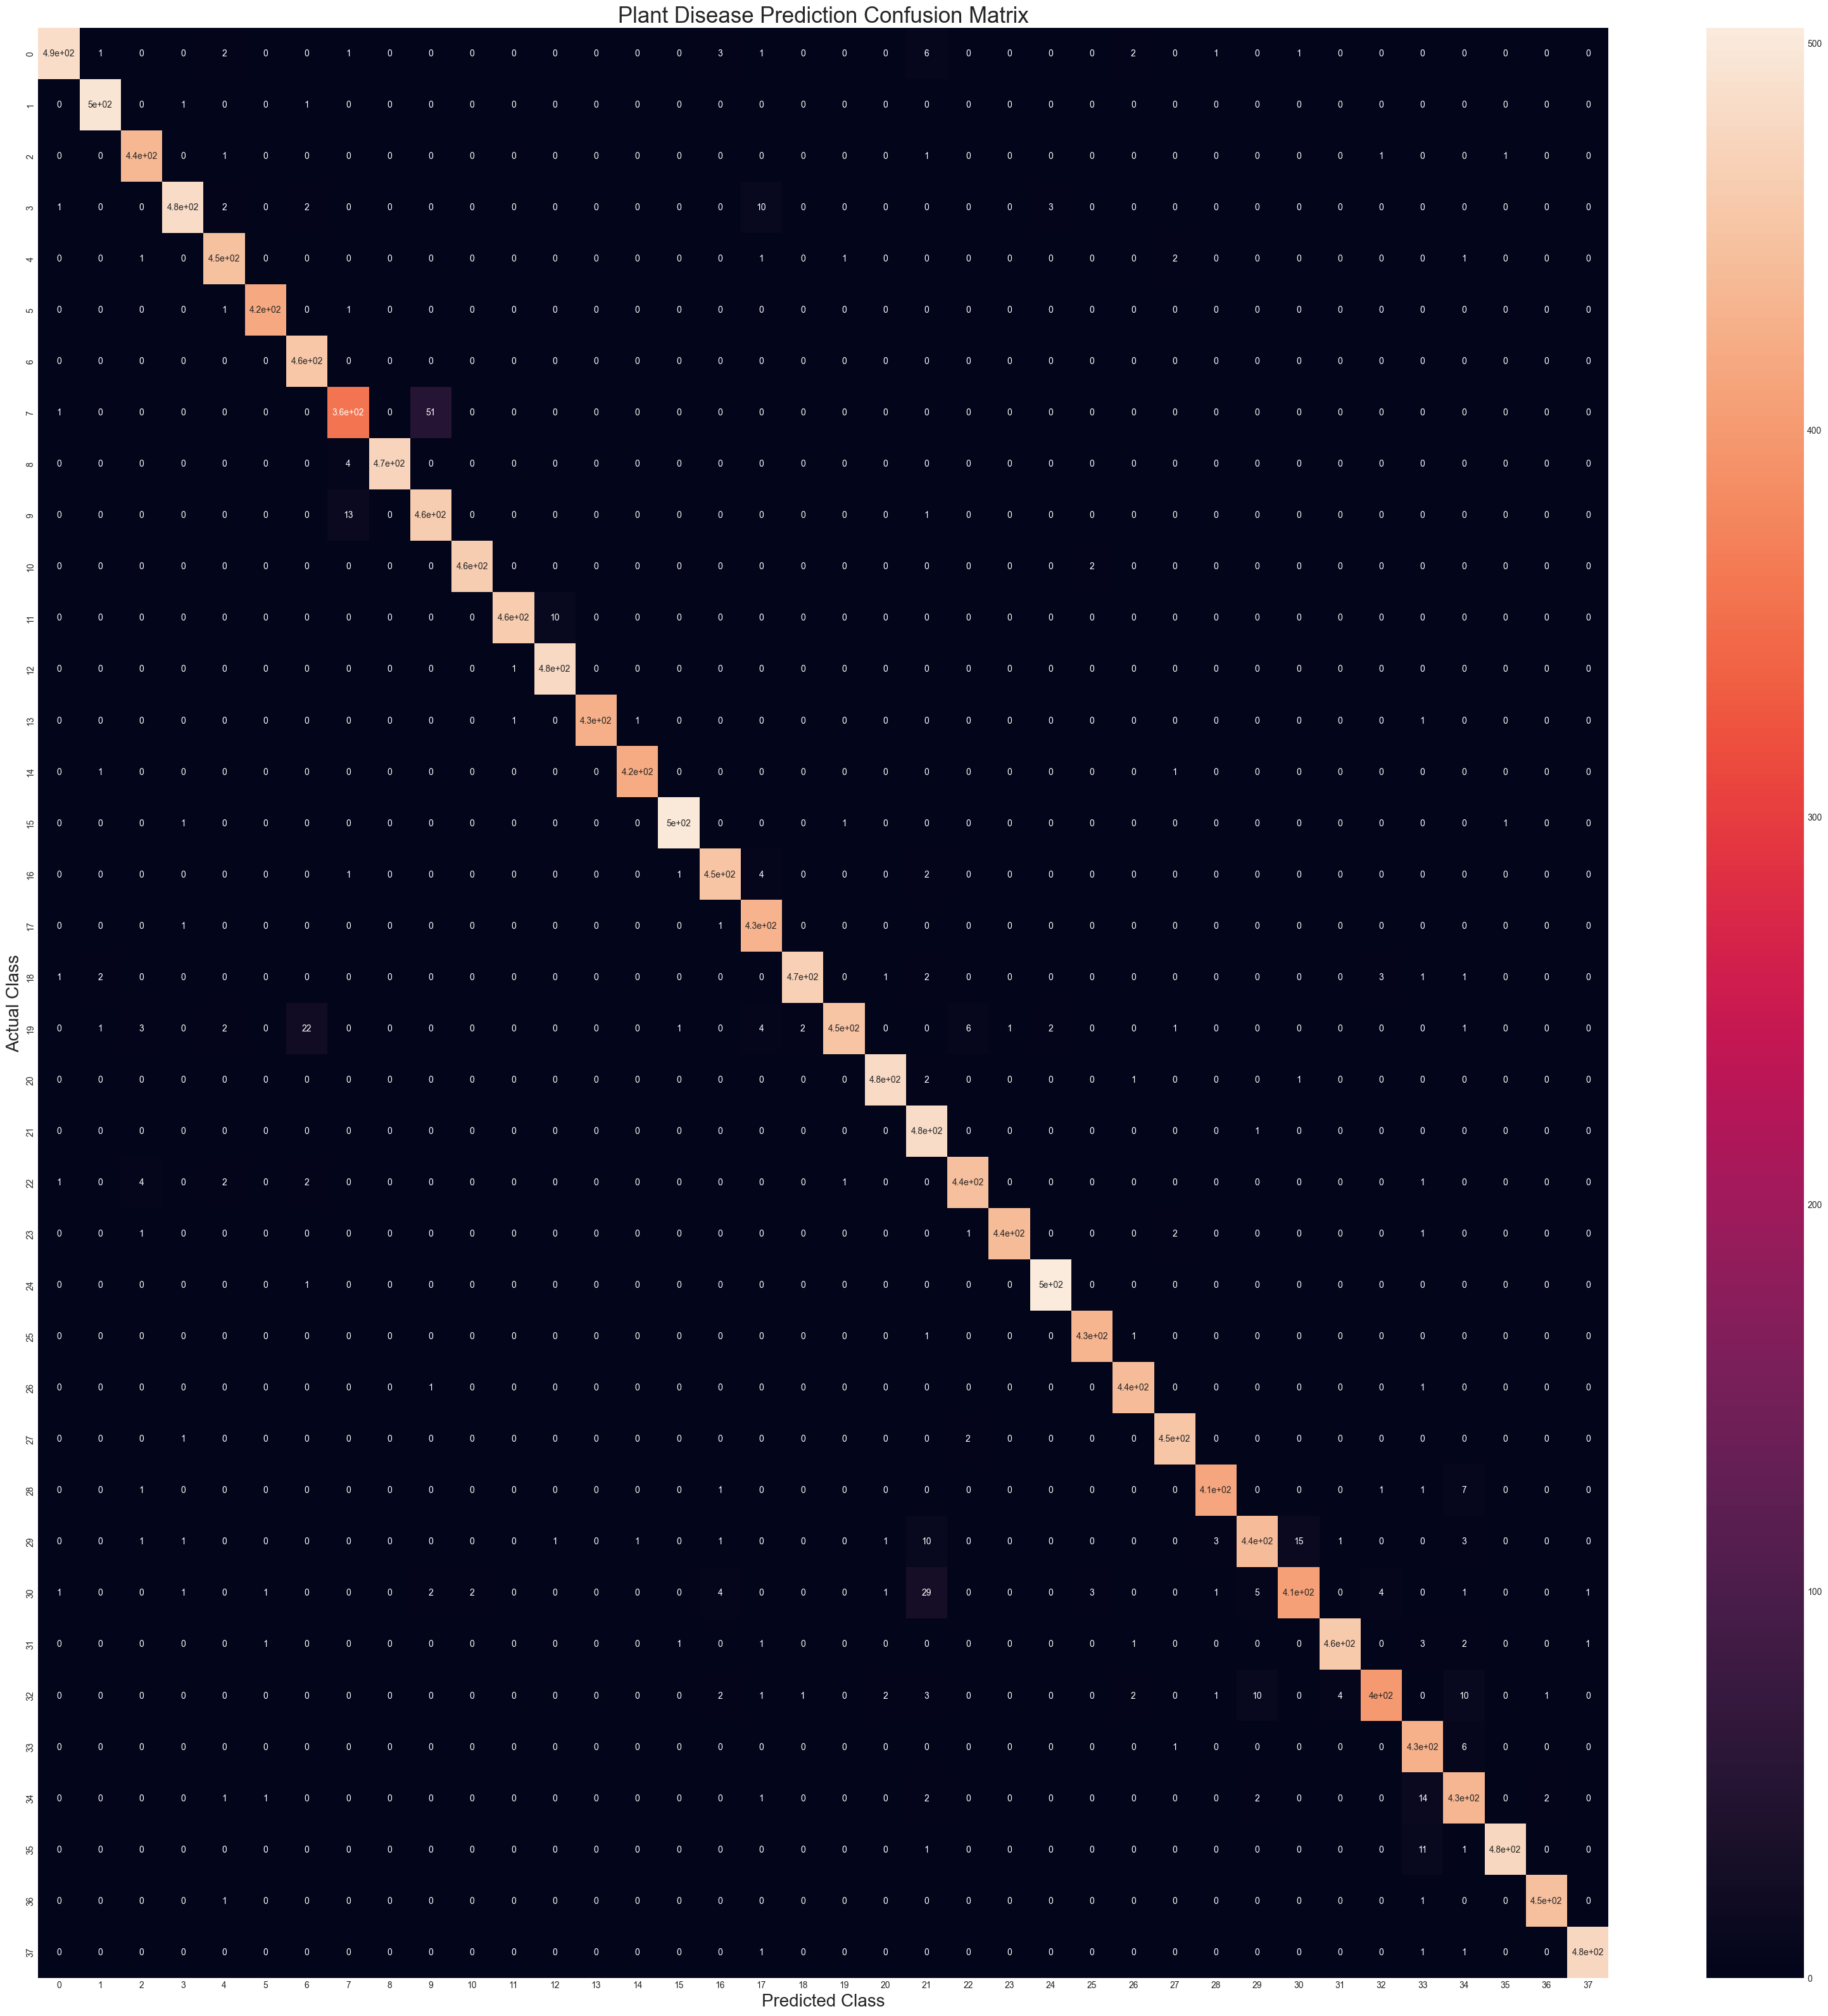

In [73]:
plt.figure(figsize=(40, 40))
sea.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()